<a href="https://colab.research.google.com/github/zzhu76/NBA-MVP-Prediction/blob/main/MVP_Feature_Selection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection**

## Heatmaps

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_csv("https://github.com/zzhu76/NBA-MVP-Prediction/files/7261063/MVP_Heatmaps_SampleData.csv")

df.head()


,Rank,Player,Age,Tm,Pts Won,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Giannis Antetokounmpo,25,MIL,962,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
1,2,LeBron James,35,LAL,753,67,34.6,25.3,7.8,10.2,1.2,0.5,0.493,0.348,0.693,9.8,0.204
2,3,James Harden,30,HOU,367,68,36.5,34.3,6.6,7.5,1.8,0.9,0.444,0.355,0.865,13.1,0.254
3,4,Luka Dončić,20,DAL,200,61,33.6,28.8,9.4,8.8,1.0,0.2,0.463,0.316,0.758,8.8,0.207
4,5,Kawhi Leonard,28,LAC,168,57,32.4,27.1,7.1,4.9,1.8,0.6,0.470,0.378,0.886,8.7,0.226


In [ ]:

corrMatrix = df.corr()
print (corrMatrix) 


             Rank       Age   Pts Won  ...       FT%        WS     WS/48
Rank     1.000000 -0.251923 -0.830890  ...  0.473977 -0.578299 -0.667821
Age     -0.251923  1.000000  0.206759  ...  0.212608  0.316612  0.208788
Pts Won -0.830890  0.206759  1.000000  ... -0.797432  0.388630  0.516821
G       -0.023149  0.200268  0.023878  ...  0.074103  0.316619 -0.036760
MP       0.190593  0.109077 -0.279170  ...  0.329406  0.176201 -0.166289
PTS     -0.617418 -0.133646  0.455924  ... -0.174952  0.594224  0.532049
TRB     -0.456418 -0.465496  0.611053  ... -0.778387  0.113169  0.385317
AST     -0.500878  0.422311  0.371444  ... -0.194282  0.430461  0.267450
STL      0.123874  0.419864 -0.273700  ...  0.620956  0.200049  0.230463
BLK     -0.026935 -0.203458  0.036977  ... -0.057623  0.175157  0.245136
FG%     -0.417296 -0.012102  0.525038  ... -0.514602  0.285393  0.453785
3P%      0.077243  0.025569 -0.185400  ...  0.357071 -0.116206 -0.355758
FT%      0.473977  0.212608 -0.797432  ...  1.00000

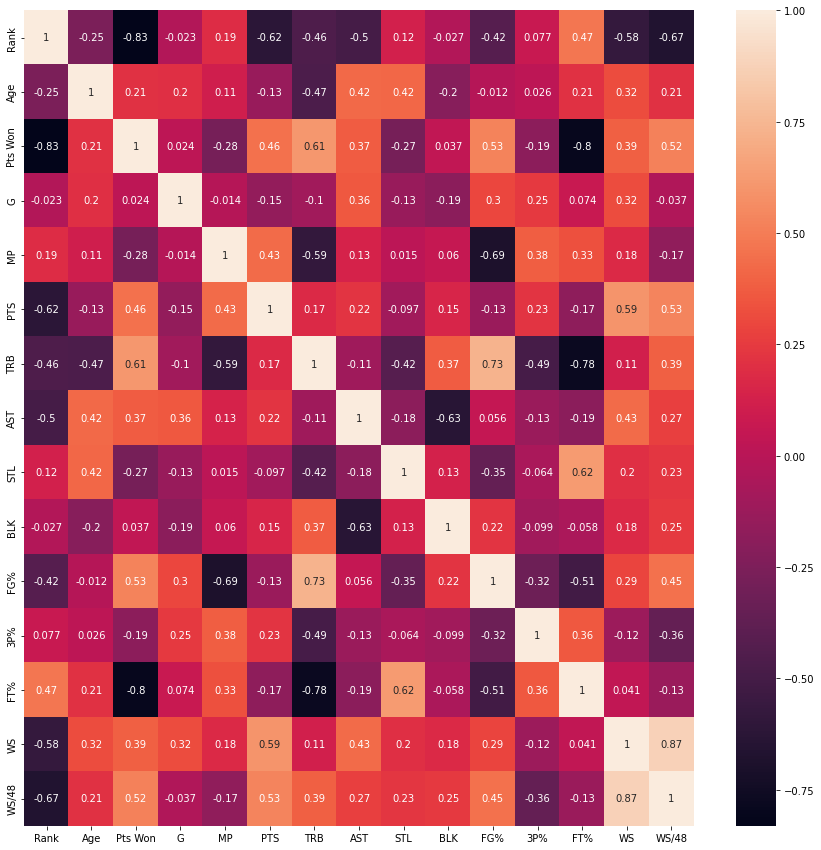

In [ ]:
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## Random Regression Feature Importance Test 



In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
df = pd.read_csv("https://github.com/zzhu76/NBA-MVP-Prediction/files/7228936/2019.xls.csv")
df = df.iloc[:, 5:]

df.head()


,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,962,1010,0.952,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279
1,753,1010,0.746,67,34.6,25.3,7.8,10.2,1.2,0.5,0.493,0.348,0.693,9.8,0.204
2,367,1010,0.363,68,36.5,34.3,6.6,7.5,1.8,0.9,0.444,0.355,0.865,13.1,0.254
3,200,1010,0.198,61,33.6,28.8,9.4,8.8,1.0,0.2,0.463,0.316,0.758,8.8,0.207
4,168,1010,0.166,57,32.4,27.1,7.1,4.9,1.8,0.6,0.470,0.378,0.886,8.7,0.226


In [ ]:
X = df.iloc[:,3:15]
y = df.iloc[:,0]

In [ ]:
#apply SelectKBest class to extract top 7 best features 
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns

In [ ]:
featureScores.nlargest(7, 'Score', keep='first')

,Specs,Score
2,PTS,10.382677
4,AST,9.225806
3,TRB,8.466098
10,WS,5.041331
6,BLK,4.626667
0,G,4.112840
1,MP,1.366322


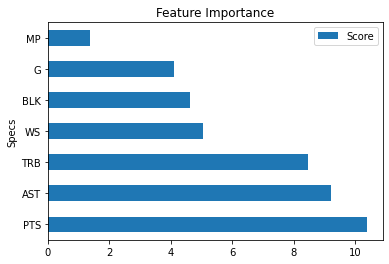

In [ ]:
import matplotlib.pyplot as plt

featureScores.nlargest(7, 'Score').plot(x='Specs', kind="barh")
plt.title('Feature Importance')
plt.show()
